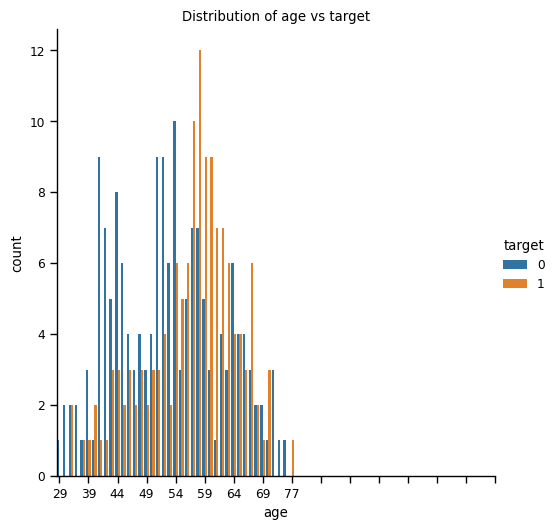

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
'fbs', 'restecg', 'thalach', 'exang',
'oldpeak', 'slope', 'ca', 'thal', 'target']

# Process data, handle null
df['target'] = df.target.map({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1}) # target = 1 ngụ ý rằng người đó đang bị bệnh tim và target = 0 ngụ ý rằng người đó không bị bệnh tim.
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())


# distribution of target vs age
sns.set_context('paper', font_scale=1, rc = {'font.size':3, 'axis.titlesize':15,'axis.labelsize':10})
ax = sns.catplot(kind="count", data = df, x="age", hue="target", order = df['age'].sort_values().unique(),)
ax.ax.set_xticks(np.arange(0,80,5))
plt.title('Distribution of age vs target')

plt.show()

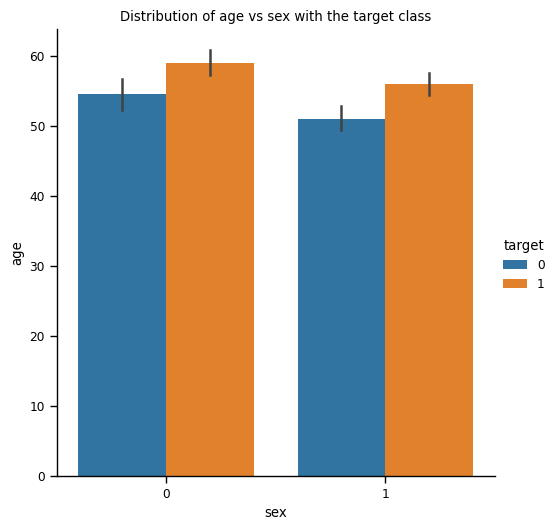

In [12]:
sns.catplot(data=df, kind ='bar',x='sex', y='age', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

# Use KNN to predict

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

X = df.iloc[: , : -1].values
y = df.iloc[: , -1].values
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size = 0.2, random_state = 42)


# Initialize the KNN model with the given parameters
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform', # đánh trọng số, trong trường hợp n là bội số của số lượng feature, với weight là distance thì điểm nào gần target thì trọng số lớn hơn
                           algorithm='auto',
                           leaf_size=30, # relate to KDTree
                           p=2, # tính khoảng cách l2 (euclidean)
                           metric='minkowski')

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Evaluate the model
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train))
print ("Accuracy for test set for KNeighborsClassifier = {}".format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


# Use SVM

In [14]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for SVM = {}".format(accuracy_for_train))
print ("Accuracy for test set for SVM = {}".format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)
y_pred_train = nb.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for GaussianNB = {}".format(accuracy_for_train))
print ("Accuracy for test set for GaussianNB = {}".format(accuracy_for_test))

Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for DecisionTree = {}".format(accuracy_for_train))
print ("Accuracy for test set for DecisionTree = {}".format(accuracy_for_test))

Accuracy for training set for DecisionTree = 1.0
Accuracy for test set for DecisionTree = 0.75


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print ("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


# AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ab.fit(X_train, y_train)


y_pred = ab.predict(X_test)
y_pred_train = ab.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for AdaBoost = {}".format(accuracy_for_train))
print ("Accuracy for test set for AdaBoost = {}".format(accuracy_for_test))

c:\Users\MinhKhanh\anaconda3\envs\deep-learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


# Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, subsample =1.0,min_samples_split=2, max_depth =3 )
gb.fit(X_train, y_train)


y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for Gradient Boost = {}".format(accuracy_for_train))
print ("Accuracy for test set for Gradient Boost = {}".format(accuracy_for_test))

Accuracy for training set for Gradient Boost = 1.0
Accuracy for test set for Gradient Boost = 0.85


# XGBoost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators =100)
xgb.fit(X_train, y_train)


y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for XGBoost = {}".format(accuracy_for_train))
print ("Accuracy for test set for XGBoost = {}".format(accuracy_for_test))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


# Stacking

In [21]:
from sklearn.ensemble import StackingClassifier


dtc = DecisionTreeClassifier(random_state =42)
rfc = RandomForestClassifier(random_state =42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state =42)
svc = SVC(kernel= 'rbf', random_state =42)
ad = AdaBoostClassifier(random_state =42)

clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]
xg = XGBClassifier()
classifier = StackingClassifier(estimators = clf, final_estimator=xgb)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print ("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print ("Accuracy for test set for Stacking = {}".format(accuracy_for_test))

c:\Users\MinhKhanh\anaconda3\envs\deep-learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\MinhKhanh\anaconda3\envs\deep-learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\MinhKhanh\anaconda3\envs\deep-learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\MinhKhanh\anaconda3\envs\deep-learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.89


c:\Users\MinhKhanh\anaconda3\envs\deep-learning\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
